<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/ClusterJerarquico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv("winequalityN.csv")

In [4]:
datos = datos.dropna()

In [5]:
datos.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
datos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
X = datos.drop(["type", "quality"], axis=1)
y = datos["type"]

In [9]:
datos.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
import numpy as np

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(X)

In [39]:
pca = PCA(n_components=2, random_state=42)

In [40]:
X_pca = pca.fit_transform(X_scaled)

In [41]:
Z = linkage(X_scaled, method='complete', metric='euclidean')

In [42]:
df_2 = pd.DataFrame({'PCA1': X_pca[:,0], 'PCA2': X_pca[:,1]})

In [44]:
from sklearn.cluster import AgglomerativeClustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


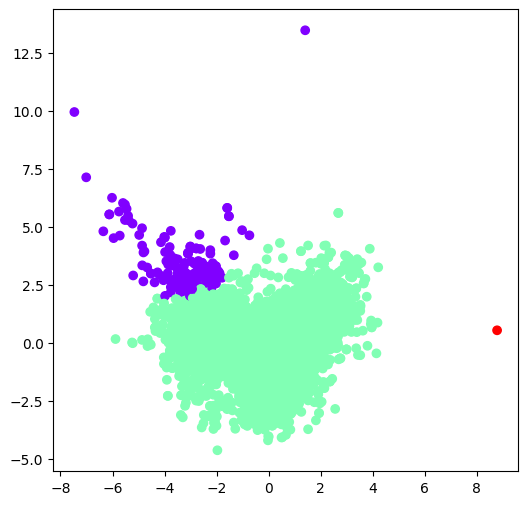

In [46]:
agg_cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
plt.figure(figsize =(6, 6))
plt.scatter(df_2['PCA1'], df_2['PCA2'],
           c = agg_cluster.fit_predict(df_2), cmap ='rainbow')
plt.show()

In [17]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Dendrograma Jerárquico')
plt.xlabel('Índice del Sample')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)

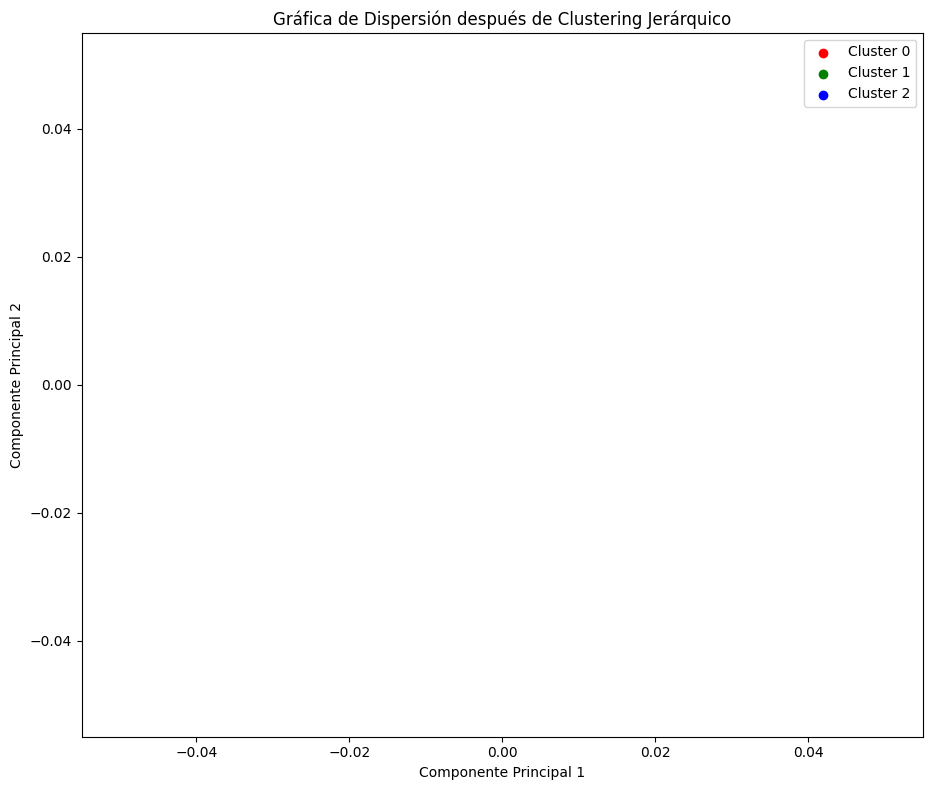

In [24]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 2)
plt.title('Gráfica de Dispersión después de Clustering Jerárquico')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Asignar colores a cada clúster
colors = ['r', 'g', 'b']
for i in range(3):  # Suponiendo que hay 3 clústeres
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=f'Cluster {i}')

plt.legend()
plt.tight_layout()
plt.show()

In [25]:
t = 20
clusters = fcluster(Z, t=t, criterion='distance')

In [ ]:
print("Asignación a Clusters:")
for sample, cluster in enumerate(clusters):
    print(f"Sample {sample + 1}: Cluster {cluster}")

In [27]:
num_clusters = len(np.unique(clusters))

print(f'Se formaron {num_clusters} clusters con el umbral (t) = {t}')

Se formaron 3 clusters con el umbral (t) = 20


In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 2)
plt.title('Gráfica de Dispersión después de Clustering Jerárquico')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Asignar colores a cada clúster
colors = ['r', 'g', 'b']
for i in range(3):  # Suponiendo que hay 3 clústeres
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], label=f'Cluster {i}')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#se obtienen la matriz utilizando el metodo de enlace completo


In [8]:
Z = linkage(X, method='complete', metric='euclidean')

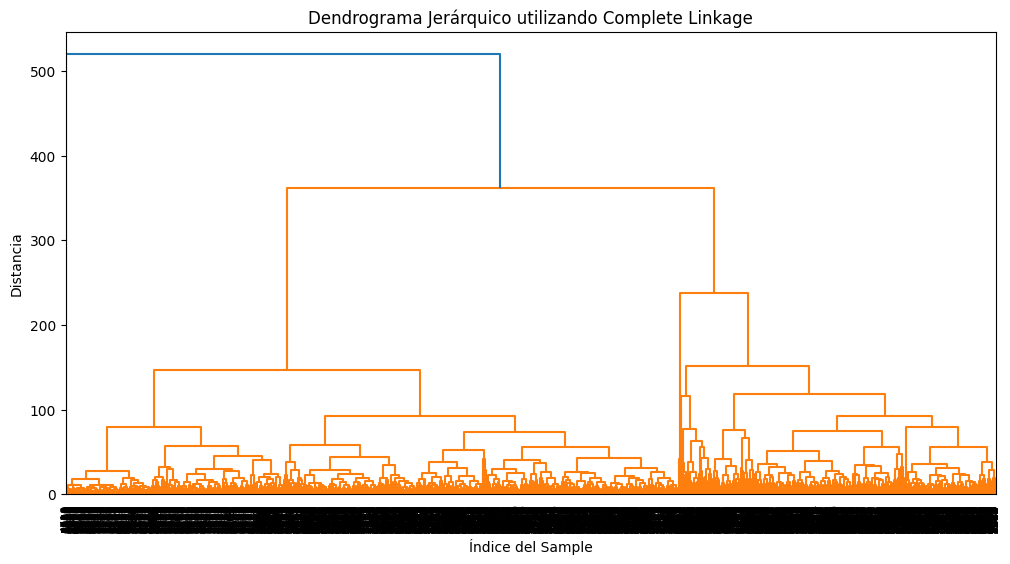

In [9]:
plt.figure(figsize=(12, 6))
plt.title('Dendrograma Jerárquico utilizando Complete Linkage')
plt.xlabel('Índice del Sample')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

In [17]:
t = 20
clusters = fcluster(Z, t=t, criterion='distance')

In [ ]:
print("Asignación a Clusters:")
for sample, cluster in enumerate(clusters):
    print(f"Sample {sample + 1}: Cluster {cluster}")

In [18]:
num_clusters = len(np.unique(clusters))

print(f'Se formaron {num_clusters} clusters con el umbral (t) = {t}')

Se formaron 139 clusters con el umbral (t) = 20


In [ ]:
#metodo promedio

In [12]:
Z = linkage(X_scaled, method='average')

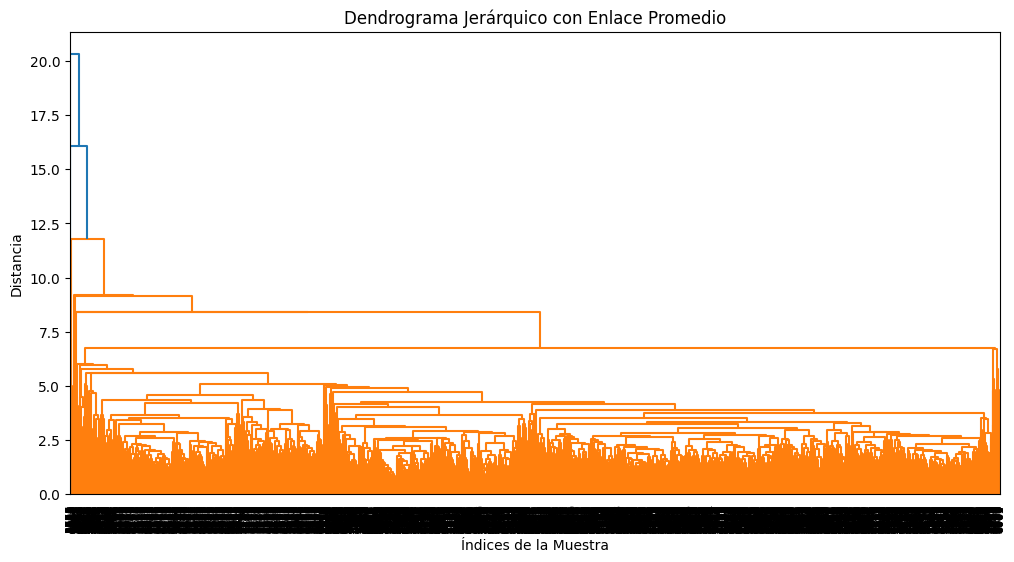

In [13]:
plt.figure(figsize=(12, 6))
plt.title('Dendrograma Jerárquico con Enlace Promedio')
plt.xlabel('Índices de la Muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.,)
plt.show()

In [14]:
t = 20
clusters = fcluster(Z, t=t, criterion='distance')

In [ ]:
print("Asignación a Clusters:")
for sample, cluster in enumerate(clusters):
    print(f"Sample {sample + 1}: Cluster {cluster}")

In [16]:
num_clusters = len(np.unique(clusters))

print(f'Se formaron {num_clusters} clusters con el umbral (t) = {t}')

Se formaron 2 clusters con el umbral (t) = 20


In [17]:
t = 6
clusters = fcluster(Z, t=t, criterion='distance')

In [ ]:
print("Asignación a Clusters:")
for sample, cluster in enumerate(clusters):
    print(f"Sample {sample + 1}: Cluster {cluster}")

In [19]:
num_clusters = len(np.unique(clusters))

print(f'Se formaron {num_clusters} clusters con el umbral (t) = {t}')

Se formaron 14 clusters con el umbral (t) = 6
